## Importing libraries

In [23]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

## Loading Model

In [3]:
model = tf.keras.models.load_model('trained_model.keras')

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

## Visualizing single image of test set

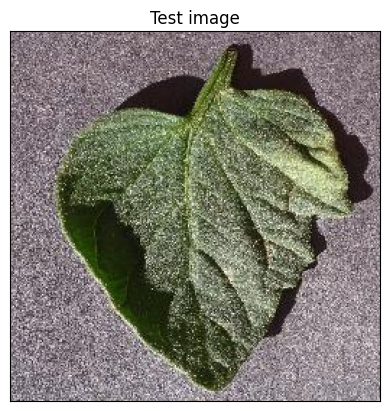

In [40]:
import cv2
image_path = "test/test/TomatoHealthy1.JPG"
#reading image
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #CONVERT BGR TO RGB

#displaying image
plt.imshow(img)
plt.title("Test image")
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [41]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_array = tf.keras.preprocessing.image.img_to_array(image)
input_array = np.array([input_array]) # convert single image to a batch
print(input_array.shape)

(1, 128, 128, 3)


In [42]:
prediction = model.predict(input_array)
prediction,prediction.shape

1/1 [==============================] - 0s 21ms/step


(array([[1.8669010e-21, 1.5920841e-19, 1.0343688e-21, 1.5745289e-16,
         3.1881958e-21, 8.5240317e-18, 4.8358355e-22, 3.6928397e-24,
         2.2264450e-25, 3.6338508e-26, 1.1463042e-23, 4.9484101e-25,
         9.8310157e-21, 4.0999983e-25, 3.8899958e-26, 7.7845349e-23,
         1.6966177e-23, 8.6239947e-23, 4.0013875e-25, 3.9335185e-21,
         4.1521243e-19, 6.2171952e-25, 2.4121853e-19, 2.9130447e-22,
         6.9838778e-21, 4.0129623e-16, 6.0915394e-21, 7.2908918e-22,
         1.2523628e-24, 1.5891994e-22, 6.7763834e-17, 4.8722861e-18,
         5.5094100e-18, 4.0479978e-18, 1.2713636e-14, 1.1555227e-25,
         6.0010346e-21, 1.0000000e+00]], dtype=float32),
 (1, 38))

In [43]:
result_index = np.argmax(prediction)
result_index

37

In [44]:
class_name = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

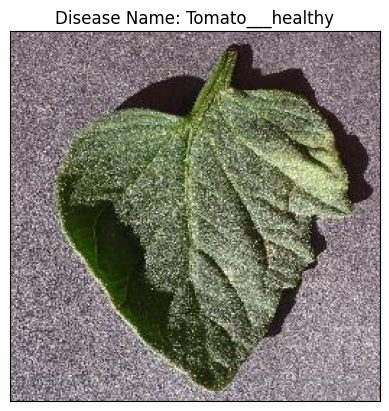

In [48]:
#Displaying result of disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [46]:
model_prediction

'Tomato___healthy'